In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X, y

In [49]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')
    
    #plt.show()

In [101]:
def decision_boundary( X, y, mean, std, theta ):
    plt.scatter(X[y == 0].values[:, 0], X[y == 0].values[:, 1],marker='x', color='b', label='0')
    plt.scatter(X[y == 1].values[:, 0], X[y == 1].values[:, 1], marker='+',color='r', label='1')
   
    x1_min, x1_max = X.values[:,0].min(), X.values[:,0].max()
    x2_min, x2_max = X.values[:,1].min(), X.values[:,1].max()
    
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel(),xx1.ravel()**2,xx2.ravel()**2,xx1.ravel()*xx2.ravel()]
    #grid = np.c_[xx1.ravel(), xx2.ravel()]
    
    probs = predict(grid,mean,std,theta).reshape(xx1.shape)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');
    plt.legend()
    

In [102]:
def normalize(X):
    mean = np.mean(X)
    std = np.max(X) - np.min(X)
    X_new = (X - mean) / std
    return X_new, mean, std

In [103]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [104]:
def sigmoid(z):
    g =  1 / ( 1 + np.exp ( -z ) )
    return g

In [105]:
def h( X, theta ):
    z = np.dot( X, theta )
    return sigmoid( z )

In [106]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    hip = h( X, theta)
    J =  ( -y * np.log( hip ) - ( 1 - y ) * np.log( 1 - hip )).mean()
    return J

In [107]:
def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None

    d_theta = np.dot ( X.T , ( h( X , theta ) - y)) / m
    
    return d_theta

In [108]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = cost_function(X,y,theta)
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        
        theta = theta - alpha * derivative_theta (X, y, theta )
        
        J = cost_function(X,y,theta)
        
        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history

In [109]:
def predict(X, mean, std, theta):
    X_new = ( X - np.array( mean ) ) / np.array( std )
    X_new = prepare_X( X_new )
    predictions = h(X_new,theta)
    predictions = ( predictions >= 0.5) . astype(int)
    return predictions

In [110]:
#data_columns = ["exam1", "exam2"]
#target_column = "submitted"
#X, y = load_datasets('sats.csv', data_columns, target_column)
#print('Training set: X={}, y={}'.format(X.shape, y.shape))

In [111]:
# Спробувати на цьому датасеті після написання всіх функцій і відлагодження на попередньому
data_columns = ["test1", "test2","test11", "test22","test12"]
target_column = "passed"
X, y = load_datasets('tests.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

Training set: X=(118, 5), y=(118,)


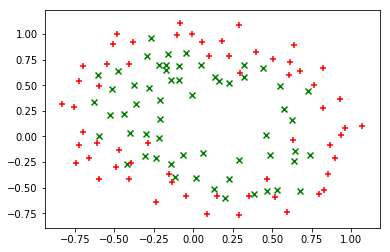

In [112]:
plot_data(X, y)

In [113]:
X_new,mean,std = normalize(X)
X_new = prepare_X(X_new)
y_new = y.values.reshape(X.shape[0], 1)

In [116]:
theta = np.zeros((X_new.shape[1], 1))

In [117]:
cost_function(X_new, y_new, theta)

0.6931471805599454

In [119]:
new_theta, Js = gradient_descent(X_new, y_new, theta, 0.5, 1e-7, 1000000, True)
print(new_theta, len(Js))

0.6931471805599454
0.6917157045639466
0.40855628890650425
0.3718724719453746
0.35957573259463677
0.35420474362544047
0.3515355230651233
0.35010497835493076
0.34930002844416463
0.34883171941695457
0.348552695455183
0.3483835168244694
[[ -0.22592822]
 [  5.87709919]
 [  7.47738488]
 [-13.29123697]
 [-13.95573257]
 [ -7.5474445 ]] 10562


In [120]:
cost_function(X_new, y_new, new_theta)

0.3483192418358157

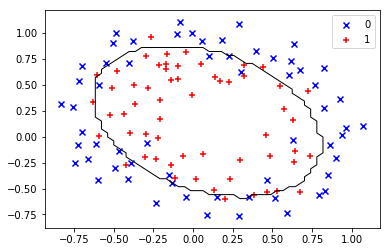

In [121]:
decision_boundary(X, y, mean, std, new_theta )

In [122]:
T = np.array([[50, 50], [63, 61]])
print( predict(T, mean, std, new_theta) )

ValueError: operands could not be broadcast together with shapes (2,2) (5,) 